In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import seaborn as sns; sns.set()


In [94]:
df= pd.read_csv('data.csv',index_col = None)

In [95]:
country_dict = {i.alpha_2: i.alpha_3 for i in pycountry.countries}
countries = pd.DataFrame(df.country.value_counts()).T\
              .rename(columns=country_dict, index={'country': 'count'})
countries

countries_rank = countries.T.rename_axis('iso_a3').reset_index()
countries_rank['rank'] = countries_rank['count'].rank()
countries_rank.T

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
iso_a3,USA,GBR,IND,AUS,CAN,PHL,(nu,ITA,MYS,PAK,...,GRD,GLP,ASM,AGO,SDN,CPV,KGZ,BFA,GUY,CYM
count,8753,1531,1464,974,924,649,369,277,247,222,...,1,1,1,1,1,1,1,1,1,1
rank,158,157,156,155,154,153,152,151,150,149,...,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5


In [96]:
df1=df.replace(0,np.nan).dropna(axis=0).reset_index(drop=True)
df1

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,4
0,3.0,53,1.0,1.0,1.0,1,US,4.0,2.0,5.0,...,1.0,3.0,1.0,5.0,1.0,4.0,2.0,5.0,5.0,2
1,13.0,46,1.0,2.0,1.0,1,US,2.0,2.0,3.0,...,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0,5
2,1.0,14,2.0,2.0,1.0,1,PK,5.0,1.0,1.0,...,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,3
3,3.0,19,2.0,2.0,1.0,1,RO,2.0,5.0,2.0,...,3.0,5.0,2.0,4.0,2.0,5.0,2.0,5.0,5.0,5
4,11.0,25,2.0,2.0,1.0,2,US,3.0,1.0,3.0,...,1.0,1.0,1.0,3.0,1.0,3.0,1.0,5.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19370,11.0,15,1.0,2.0,1.0,2,SG,1.0,4.0,3.0,...,3.0,5.0,3.0,4.0,1.0,4.0,2.0,5.0,3.0,4
19371,3.0,37,1.0,2.0,1.0,2,US,2.0,3.0,2.0,...,2.0,3.0,2.0,3.0,3.0,4.0,2.0,3.0,3.0,5
19372,5.0,16,2.0,1.0,1.0,2,US,2.0,5.0,4.0,...,3.0,1.0,3.0,4.0,1.0,1.0,5.0,5.0,5.0,4
19373,12.0,16,1.0,1.0,1.0,5,NG,1.0,4.0,2.0,...,2.0,5.0,3.0,4.0,1.0,5.0,3.0,5.0,5.0,1


In [97]:
data=df1.iloc[:, 7:]

In [98]:
pos_questions = [ 
    'E1','E3','E5','E7','E9',                     
    'N1','N3','N5','N6','N7','N8','N9','N10', 
    'A2','A4','A6','A8','A9','A10',              
    'C1','C3','C5','C7','C9','C10',                   
    
    'O1','O3','O5','O7','O8','O9','O10',      
]
neg_questions = [ 
    'E2','E4','E6','E8','E10', 
    'N2','N4',                      
    'A1','A3','A5','A7',       
    'C2','C4','C6','C8',         
    'O2','O4','O6',               
]

data[pos_questions] = data[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
data[neg_questions] = data[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})
cols = pos_questions + neg_questions
data = data[sorted(cols)]
data.head()

,A1,A10,A2,A3,A4,A5,A6,A7,A8,A9,...,O1,O10,O2,O3,O4,O5,O6,O7,O8,O9
0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,1.0,...,1.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,-1.0,2.0
1,2.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,1.0,...,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-2.0,0.0
2,-2.0,2.0,-2.0,-2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,-2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,0.0,2.0,-1.0,1.0,0.0,2.0,0.0,1.0,1.0,...,1.0,2.0,0.0,2.0,1.0,1.0,1.0,2.0,-1.0,2.0
4,-2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,2.0,-2.0,2.0,0.0,2.0,0.0,-2.0,2.0


In [99]:
traits = ['O','C','E','A','N']
trait_labels = ['Openness', 'Conscientiousness','Extroversion', 'Agreeableness','Neuroticism']


for trait in traits:
    trait_cols = sorted([col for col in data.columns if trait in col])
    data[trait] = data[trait_cols].sum(axis=1)
data[traits]

,O,C,E,A,N
0,13.0,17.0,14.0,16.0,-19.0
1,-4.0,12.0,-8.0,5.0,1.0
2,15.0,19.0,5.0,8.0,16.0
3,11.0,-4.0,-8.0,7.0,13.0
4,4.0,4.0,4.0,14.0,0.0
...,...,...,...,...,...
19370,5.0,6.0,-9.0,12.0,11.0
19371,0.0,2.0,-5.0,6.0,-9.0
19372,7.0,-7.0,-9.0,-4.0,20.0
19373,12.0,13.0,-9.0,8.0,10.0


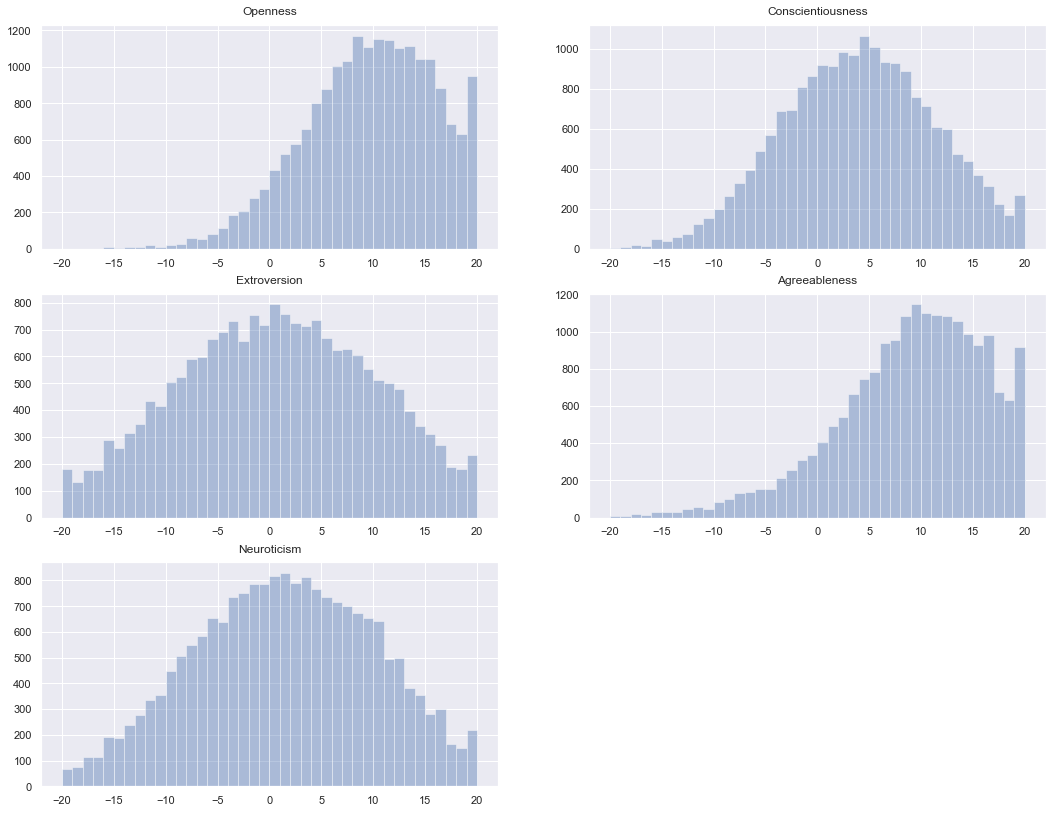

In [100]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(18,9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.3, wspace=None, hspace=None)
row = -1; col = 2
for i, (trait, label) in enumerate(zip(traits, trait_labels)):
    if not i % 2:
        row += 1
    if not i % 2:
        col -= 2
    i += col
    sns.distplot(data[trait], ax=axs[row][i], axlabel='', kde=False, bins=40).set_title(label, pad=10)
fig.delaxes(axs[2][1])

In [116]:
import scipy
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.iloc[:,7:]
y= data.iloc[:,:-1]

In [115]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

classifier = ClassifierChain(GaussianNB())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


classifier.fit(X_train, y_train)


predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.3

In [113]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=20)
classifier.fit(X_train, y_train)


predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.85

In [118]:
def knn_comparison(data, k):
    x = data[[‘X’,’y’]].values
    y = data[‘class’].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)

    plot_decision_regions(x, y, clf=clf, legend=2)

    plt.xlabel(‘X’)
    plt.ylabel(‘y’)
    plt.title(‘Knn with K=’+ str(k))
    plt.show()

SyntaxError: invalid character in identifier (<ipython-input-118-0ae1194033d9>, line 2)

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_model = pca.fit_transform(data)
data_transform = pd.DataFrame(data = pca_model, columns = ['PCA1', 'PCA2'])
data_transform['Cluster'] = predictions

In [85]:
plt.figure(figsize=(15,15))
g = sns.scatterplot(data=df_transform, x='PCA1', y='PCA2', palette=sns.color_palette()[:5], hue='Cluster')
title = plt.title('Personality Clusters with PCA')

TypeError: unhashable type: 'lil_matrix'

<Figure size 1080x1080 with 0 Axes>